## Outlier removal

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the preprocessed (missing values handled dataset)
data=pd.read_csv('https://raw.githubusercontent.com/thamidu02/AIML_project/refs/heads/main/data/IT24104083.csv')

In [3]:
# convert the imported dataset into a pandas dataframe
data_df=pd.DataFrame(data)

In [4]:
# selecting numerical features
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: \n{numerical_features}")

Numerical features: 
['age', 'height', 'weight', 'bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'stress_level', 'mental_health_score', 'income', 'meals_per_day', 'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score', 'daily_supplement_dosage']


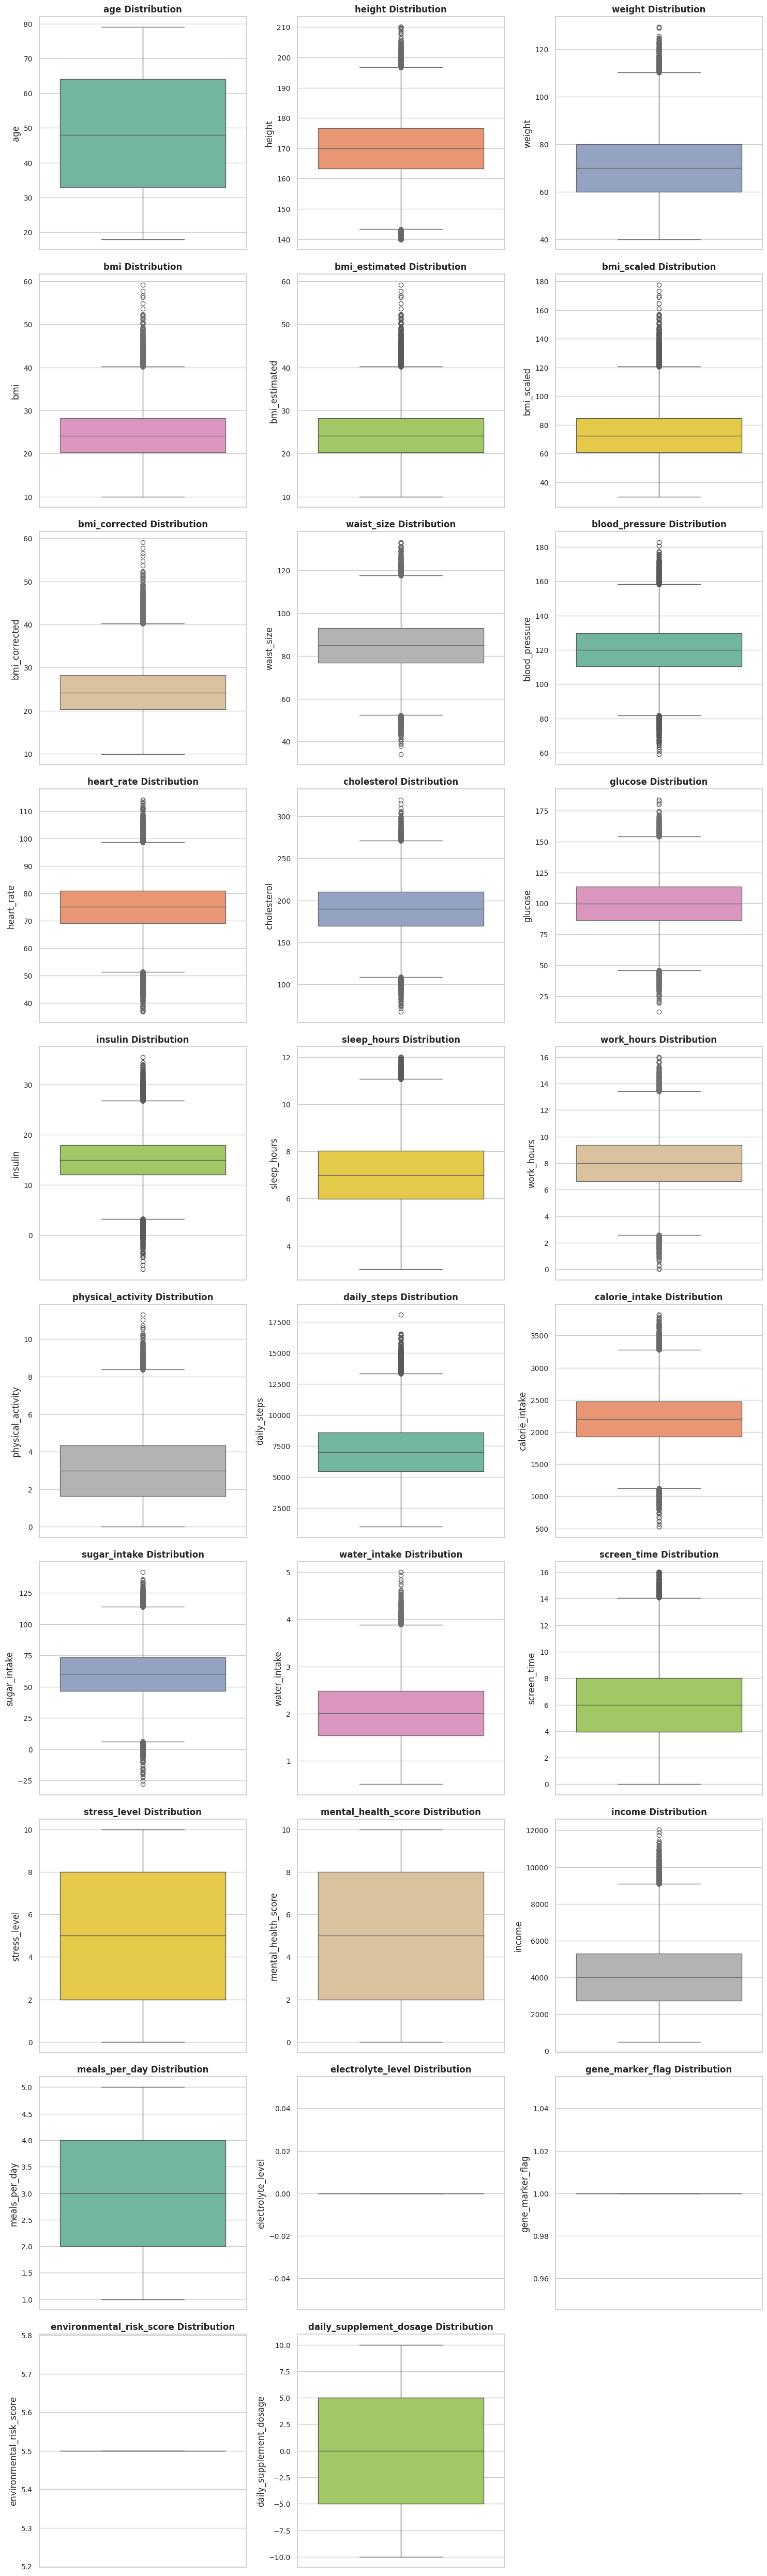

In [5]:
import math

sns.set(style="whitegrid", palette="pastel")

n = len(numerical_features)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))


axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(y=data_df[col], ax=axes[i], color=sns.color_palette("Set2")[i % 8])
    axes[i].set_title(f"{col} Distribution", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='y', labelsize=10)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
outlier_counts = {}

for col in numerical_features:
    Q1 = data_df[col].quantile(0.25)
    Q3 = data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = data_df[(data_df[col] < lower_bound) | (data_df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

outlier_counts = pd.Series(outlier_counts, name="Outlier_Counts")
print(outlier_counts)


age                            0
height                       627
weight                       260
bmi                          735
bmi_estimated                735
bmi_scaled                   735
bmi_corrected                731
waist_size                   525
blood_pressure               808
heart_rate                  1285
cholesterol                  518
glucose                      539
insulin                     1277
sleep_hours                  269
work_hours                   499
physical_activity            263
daily_steps                  429
calorie_intake               570
sugar_intake                 552
water_intake                 274
screen_time                  277
stress_level                   0
mental_health_score            0
income                       413
meals_per_day                  0
electrolyte_level              0
gene_marker_flag               0
environmental_risk_score       0
daily_supplement_dosage        0
Name: Outlier_Counts, dtype: int64


In [7]:
# Calculate the number of outliers to remove
num_outliers_to_remove = 500

# Calculate IQR for the 'insulin' column
Q1 = data_df['insulin'].quantile(0.25)
Q3 = data_df['insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_df[(data_df['insulin'] < lower_bound) | (data_df['insulin'] > upper_bound)]

# Sort outliers by their distance from the median to find the outermost 500
median_insulin = data_df['insulin'].median()
outliers['distance_from_median'] = abs(outliers['insulin'] - median_insulin)
outermost_outliers = outliers.sort_values(by='distance_from_median', ascending=False).head(num_outliers_to_remove)

# Get the indices of the outermost outliers
outlier_indices = outermost_outliers.index

# Drop the outermost outlier rows from the DataFrame
data_df = data_df.drop(outlier_indices)

print(f"Removed {len(outlier_indices)} outermost outliers from the 'insulin' column.")
print(f"New shape of the DataFrame: {data_df.shape}")

Removed 500 outermost outliers from the 'insulin' column.
New shape of the DataFrame: (78324, 44)


In [8]:
data_df.to_csv('IT24102905.csv',index=False)